In [1]:
# importing the necessary libraries
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
# Define image paths
with_mask=(r"C:\Users\sushmitha\Downloads\face-mask-dataset\Dataset\test\test\with_mask")
without_mask=(r"C:\Users\sushmitha\Downloads\face-mask-dataset\Dataset\test\test\without_mask")
pd.DataFrame([len(os.listdir(with_mask)),len(os.listdir(without_mask))],columns=['Number'],index=['with_mask','without_mask'])

Number
with_mask         97
without_mask      97

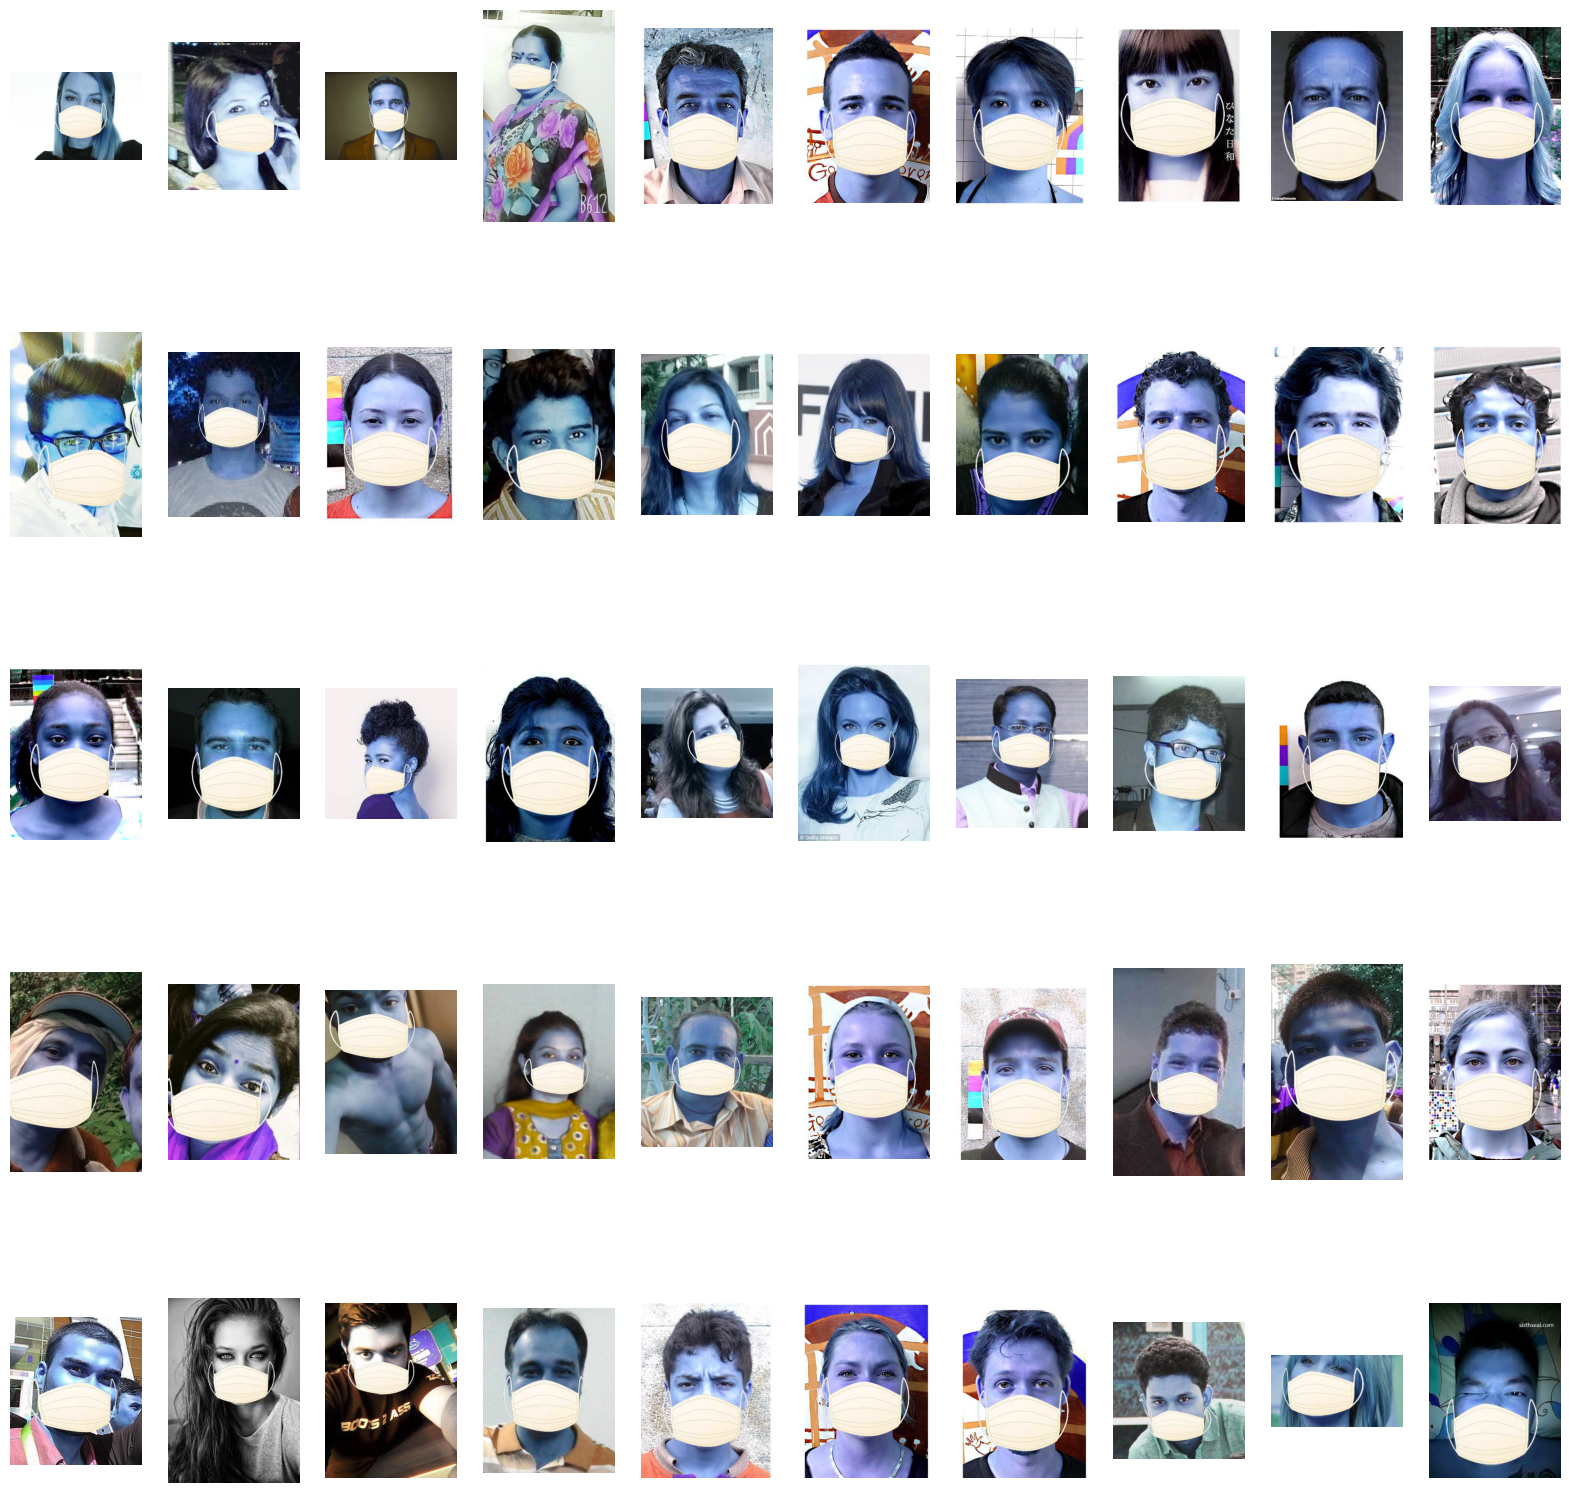

In [3]:
#Show With Mask Image
i=1
plt.figure(figsize=(20,20))
for img in os.listdir(with_mask):
    if i==51:
        break
    plt.subplot(5,10,i)
    img_arr=cv2.imread(os.path.join(with_mask,img))
    plt.imshow(img_arr)
    i+=1
    plt.axis('off')

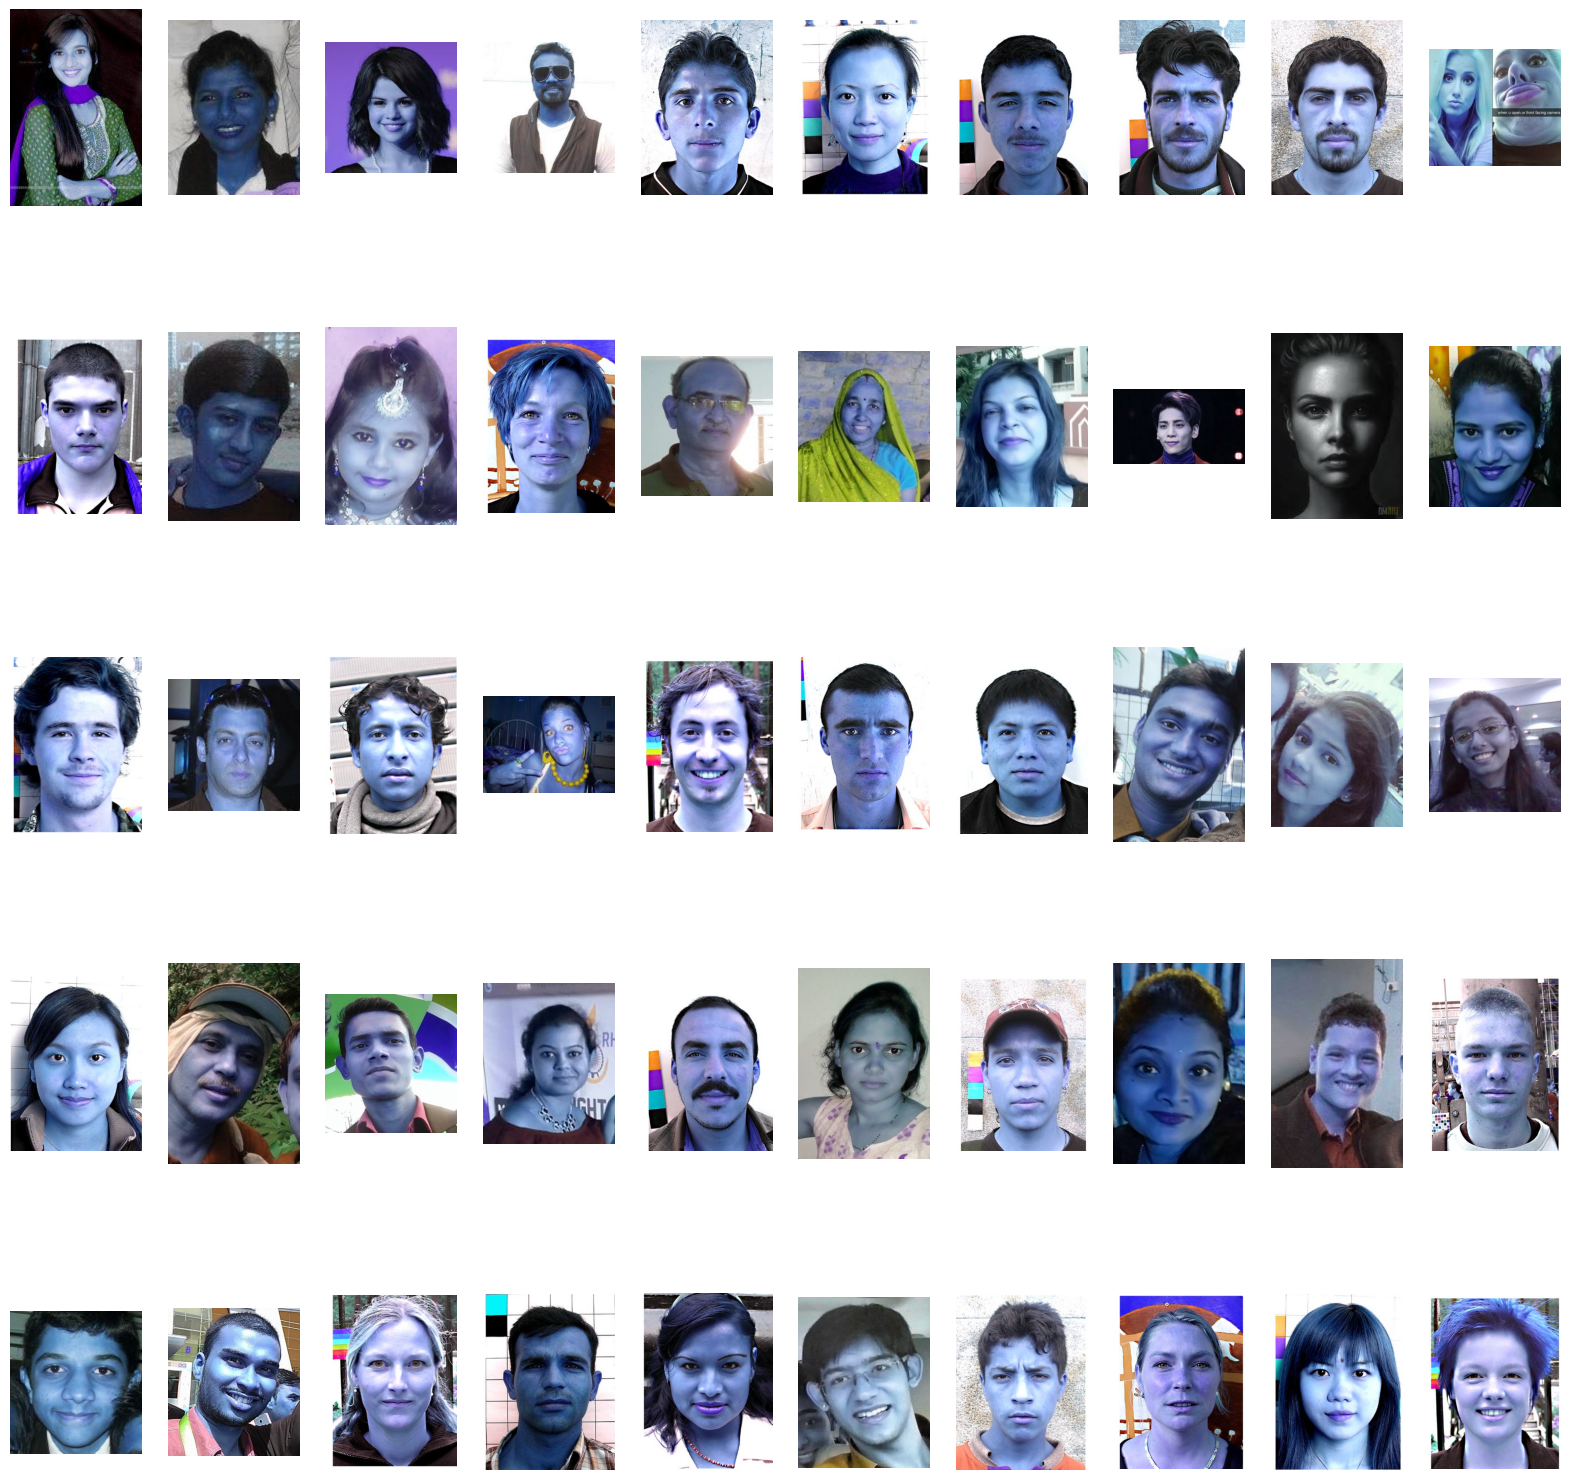

In [4]:
#Show Without Mask Image
i=1
plt.figure(figsize=(20,20))
for img in os.listdir(without_mask):
    if i==51:
        break
    plt.subplot(5,10,i)
    img_arr=cv2.imread(os.path.join(without_mask,img))
    plt.imshow(img_arr)
    i+=1
    plt.axis('off')

In [5]:
label=[]
data=[]
size=[]
#with mask label 1
for img in os.listdir(with_mask):
    img_arr=cv2.imread(os.path.join(with_mask,img))
    data.append(img_arr)
    label.append(1)
    size.append(img_arr.shape)
#without mask label 0
for img in os.listdir(without_mask):
    img_arr=cv2.imread(os.path.join(without_mask,img))
    data.append(img_arr)
    label.append(0)
    size.append(img_arr.shape)

In [6]:

pd.DataFrame(pd.Series(size).value_counts(),columns=['Number'])

Empty DataFrame
Columns: [Number]
Index: []

In [7]:
size=128
for x in range(len(data)):
    data[x]=cv2.resize(data[x],(size,size))

In [8]:
data = np.array(data)
label = np.array(label)
X_train,X_test,y_train,y_test = train_test_split(data,label,test_size=.15,shuffle=True,random_state=44)
print('X Train Shape is :',X_train.shape)
print('X Test Shape is :',X_test.shape)
print('Y Train Shape is :',y_train.shape)
print('Y Test Shape is :',y_test.shape)

X Train Shape is : (164, 128, 128, 3)
X Test Shape is : (30, 128, 128, 3)
Y Train Shape is : (164,)
Y Test Shape is : (30,)


# building a model

In [9]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(size,size,3)))
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu))
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(2, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [11]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=10,validation_split = 0.1)

Epoch 1/10
5/5 [==============================] - 2s 172ms/step - loss: 153.1417 - accuracy: 0.5374 - val_loss: 29.7403 - val_accuracy: 0.4706
Epoch 2/10
5/5 [==============================] - 1s 84ms/step - loss: 23.3953 - accuracy: 0.5714 - val_loss: 0.8536 - val_accuracy: 0.7059
Epoch 3/10
5/5 [==============================] - 0s 50ms/step - loss: 4.1538 - accuracy: 0.5034 - val_loss: 0.7045 - val_accuracy: 0.6471
Epoch 4/10
5/5 [==============================] - 1s 119ms/step - loss: 0.5704 - accuracy: 0.7551 - val_loss: 0.5429 - val_accuracy: 0.7059
Epoch 5/10
5/5 [==============================] - 0s 50ms/step - loss: 0.4817 - accuracy: 0.7891 - val_loss: 0.6192 - val_accuracy: 0.6471
Epoch 6/10
5/5 [==============================] - 0s 111ms/step - loss: 0.2427 - accuracy: 0.9184 - val_loss: 0.8224 - val_accuracy: 0.7647
Epoch 7/10
5/5 [==============================] - 0s 68ms/step - loss: 0.1947 - accuracy: 0.9116 - val_loss: 0.6441 - val_accuracy: 0.8235
Epoch 8/10
5/5 [====

In [12]:
hist = pd.DataFrame(hist.history)
hist

loss  accuracy   val_loss  val_accuracy
0  153.141708  0.537415  29.740316      0.470588
1   23.395327  0.571429   0.853596      0.705882
2    4.153752  0.503401   0.704452      0.647059
3    0.570445  0.755102   0.542935      0.705882
4    0.481698  0.789116   0.619245      0.647059
5    0.242705  0.918367   0.822381      0.764706
6    0.194663  0.911565   0.644070      0.823529
7    0.165768  0.945578   0.613155      0.647059
8    0.132627  0.965986   0.742292      0.764706
9    0.205409  0.938776   0.630685      0.823529

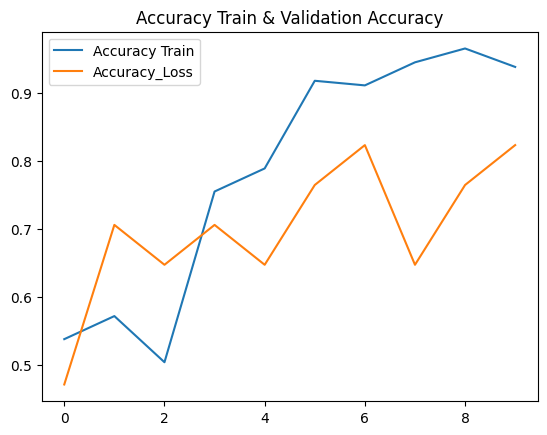

In [13]:
plt.plot(hist['accuracy'],label='Accuracy Train')
plt.plot(hist['val_accuracy'],label='Accuracy_Loss')
plt.title('Accuracy Train & Validation Accuracy')
plt.legend()

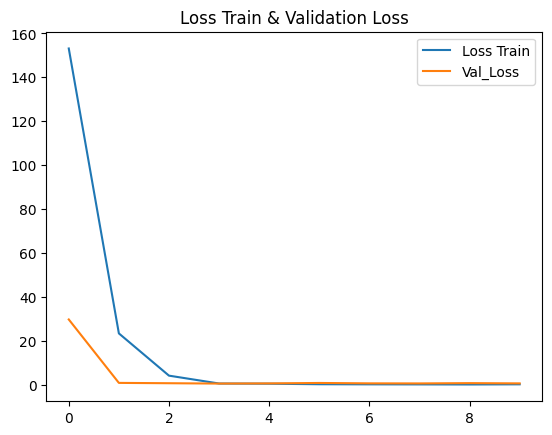

In [14]:
plt.plot(hist['loss'],label='Loss Train')
plt.plot(hist['val_loss'],label='Val_Loss')
plt.title('Loss Train & Validation Loss')
plt.legend()

In [15]:
score, acc = model.evaluate(X_test, y_test)
print('Test Loss =', score)
print('Test Accuarcy =', acc)

1/1 [==============================] - 0s 49ms/step - loss: 0.9699 - accuracy: 0.6667
Test Loss = 0.9699239134788513
Test Accuarcy = 0.6666666865348816


In [16]:
prediction = model.predict(X_test)
prediction

1/1 [==============================] - 0s 190ms/step


array([[5.8367831e-04, 9.9941623e-01],
       [9.9806798e-01, 1.9320153e-03],
       [9.9110436e-01, 8.8957194e-03],
       [9.8010695e-01, 1.9893022e-02],
       [1.9033559e-01, 8.0966449e-01],
       [5.7206061e-02, 9.4279397e-01],
       [9.6798456e-01, 3.2015502e-02],
       [7.6521236e-01, 2.3478770e-01],
       [6.1495596e-01, 3.8504398e-01],
       [1.4524853e-02, 9.8547512e-01],
       [8.6606252e-01, 1.3393751e-01],
       [5.5992556e-01, 4.4007435e-01],
       [1.7351054e-02, 9.8264891e-01],
       [5.4062741e-09, 9.9999994e-01],
       [9.9673587e-01, 3.2641168e-03],
       [8.0238825e-01, 1.9761175e-01],
       [6.9454122e-01, 3.0545869e-01],
       [6.6178972e-01, 3.3821025e-01],
       [1.6471890e-01, 8.3528113e-01],
       [9.3529567e-02, 9.0647042e-01],
       [4.6618837e-01, 5.3381169e-01],
       [5.1881172e-02, 9.4811869e-01],
       [9.6278054e-01, 3.7219547e-02],
       [1.9491219e-04, 9.9980521e-01],
       [9.3869442e-01, 6.1305553e-02],
       [3.2963967e-01, 6.

In [17]:
pred_label=[]
for row in prediction:
    N=np.argmax(row)
    if N==1:
        pred_label.append('with mask')
    else:
        pred_label.append('without mask')
pd.DataFrame(pred_label,columns=['prediction'])

prediction
0      with mask
1   without mask
2   without mask
3   without mask
4      with mask
5      with mask
6   without mask
7   without mask
8   without mask
9      with mask
10  without mask
11  without mask
12     with mask
13     with mask
14  without mask
15  without mask
16  without mask
17  without mask
18     with mask
19     with mask
20     with mask
21     with mask
22  without mask
23     with mask
24  without mask
25     with mask
26  without mask
27     with mask
28     with mask
29     with mask

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

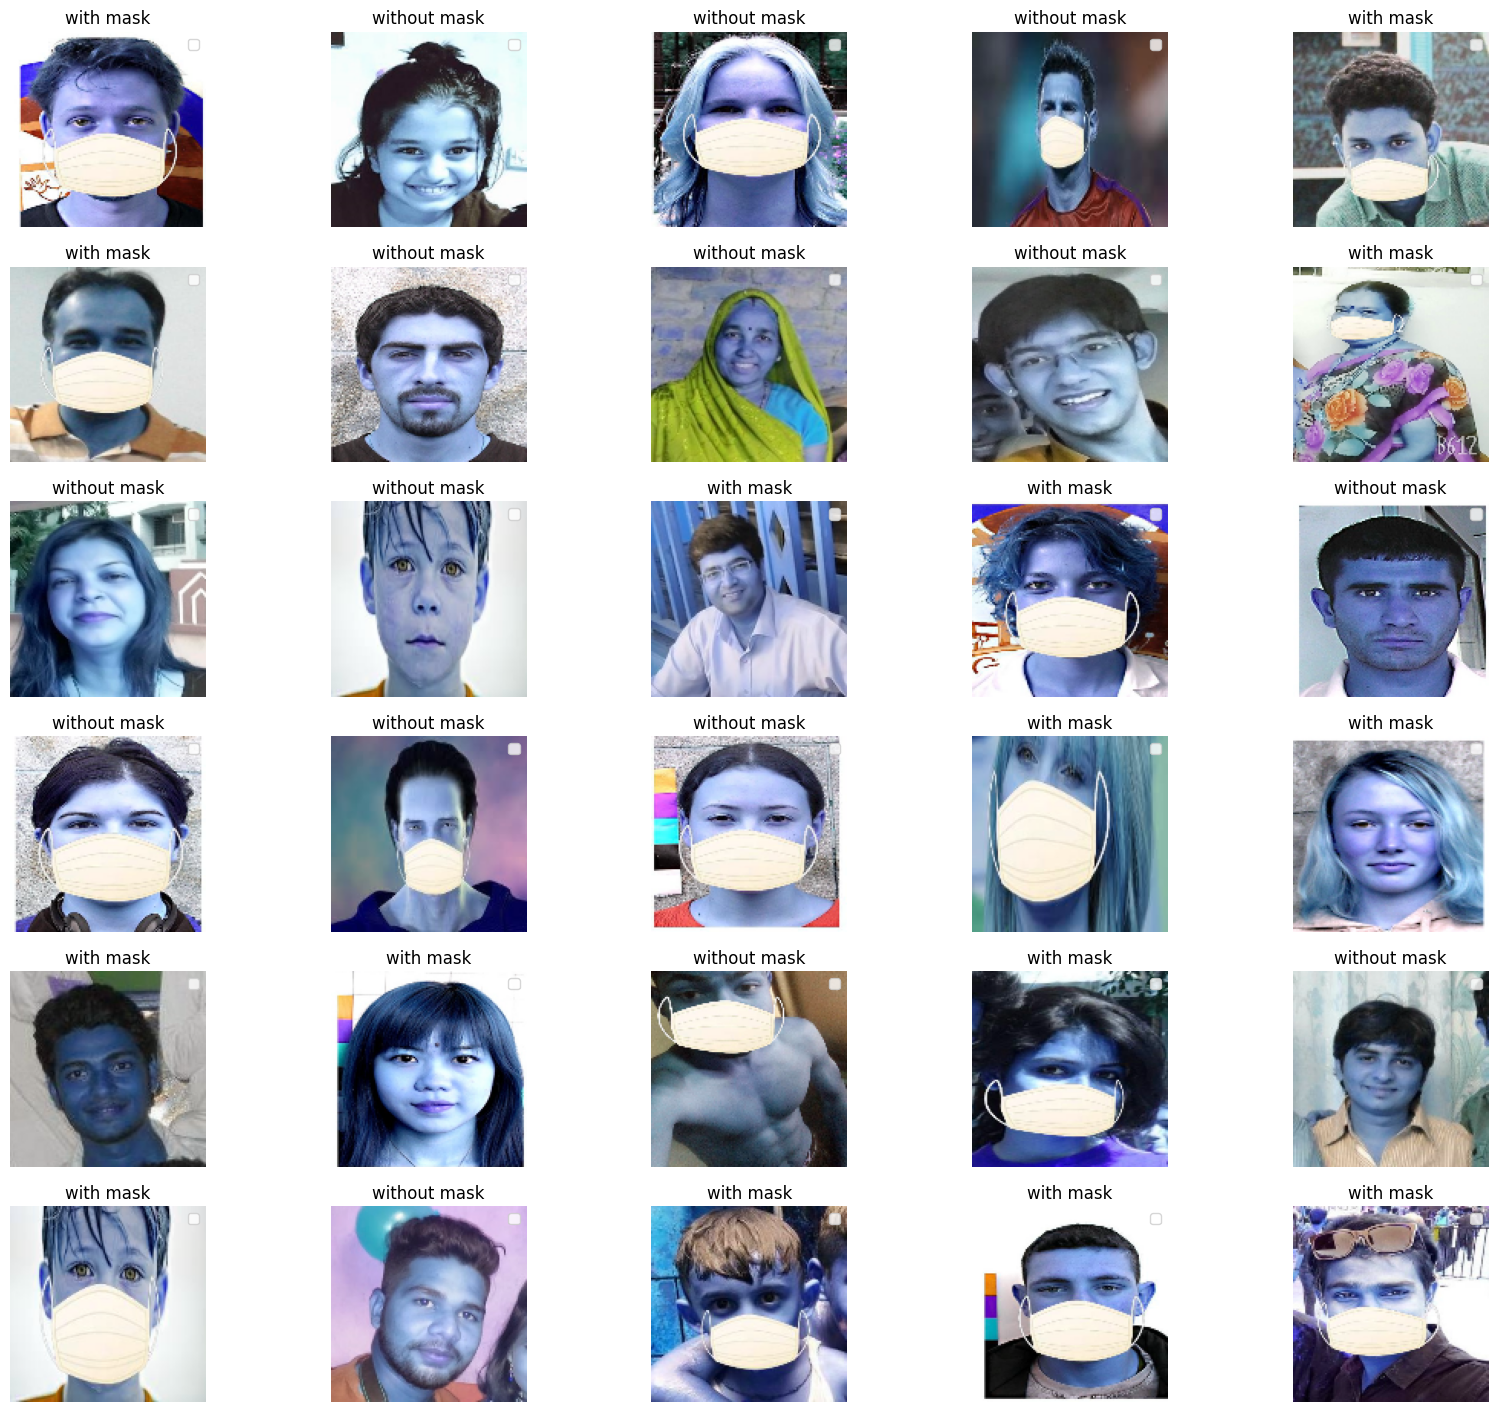

In [18]:
plt.figure(figsize=(20,30))
i = 1
for img in X_test:
    if i==51:
        break
    plt.subplot(10,5,i)
    plt.imshow(img)
    plt.title(pred_label[i-1])
    plt.legend()
    i+=1
    plt.axis('off')

# calculating confusion matrix

array([[ 9,  4],
       [ 6, 11]], dtype=int64)

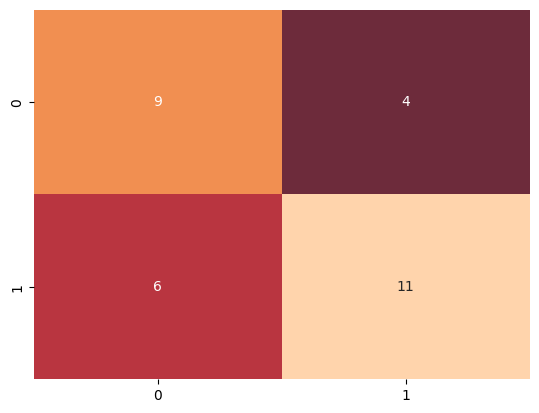

In [19]:
y_pred=[1 if m=='with mask' else 0 for m in pred_label]
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, center = True,annot=True,cbar=False)
CM

# calculating classification report

In [20]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport)

Classification Report is :                precision    recall  f1-score   support

           0       0.60      0.69      0.64        13
           1       0.73      0.65      0.69        17

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.68      0.67      0.67        30

